# GROW INTERN INTERNSHIP - TASK_01

# ABOUT DATASET

The dataset titled "Netflix Stock Price Prediction" is designed for time series analysis and forecasting of Netflix's stock prices. Here are the key details about the dataset:

1. **Dataset Overview:**
   - **Content:** The dataset covers daily stock price data for Netflix (NFLX) from February 5, 2018, to February 4, 2022.
   - **Features:** It includes 7 columns:
     - **Date:** The date of trading.
     - **Open:** The opening price of Netflix stock on that day.
     - **High:** The highest price reached during the day.
     - **Low:** The lowest price reached during the day.
     - **Close:** The closing price adjusted for splits.
     - **Adj Close:** The adjusted closing price adjusted for splits, dividends, and capital gains.
     - **Volume:** The volume of Netflix stocks traded on that day.

2. **Usage and Relevance:**
   - **Usability:** Rated at 10.00, indicating high usability for business and investment analysis.
   - **Tags:** Tagged with "Business," "Investing," "Intermediate," "Time Series Analysis," "Python," and "LSTM," suggesting its relevance in financial forecasting using Python and LSTM models.
   - **License:** Public Domain (CC0), allowing for unrestricted use and distribution.

3. **Expected Update Frequency:** Never updated, indicating that the dataset covers a fixed time period without ongoing updates.

4. **Data Exploration and Analysis:**
   - The dataset provides insights into Netflix's stock price movements over time, essential for building predictive models and understanding market trends.
   - Ideal for exploring techniques in time series forecasting, such as LSTM (Long Short-Term Memory) models, commonly used for capturing temporal dependencies in sequential data like stock prices.

5. **Additional Information:**
   - **File Size:** 74.93 kB
   - **Downloads:** 13.1K in the last 30 days, indicating active interest and usage.

This dataset is valuable for researchers, analysts, and data scientists interested in financial forecasting and time series analysis, particularly within the context of stock market prediction using historical data.

# LIBRARIES

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [25]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [26]:
df = pd.read_csv('/content/drive/MyDrive/SUMMER_2024/GROW-INTERN INTERNSHIP/Netflix Stock Price Prediction/NFLX.csv')

In [27]:
df.shape

(1009, 7)

In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# DATA CLEANING

In [29]:
df.isnull().sum().any()

False

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [32]:
df.columns = df.columns.str.lower()

In [33]:
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series(map(int, x.split('-'))))

In [34]:
df.drop(['date'], axis = 1, inplace = True)
df.head()

,open,high,low,close,adj close,volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


# DATA PRE-PROCESSING

## EDA

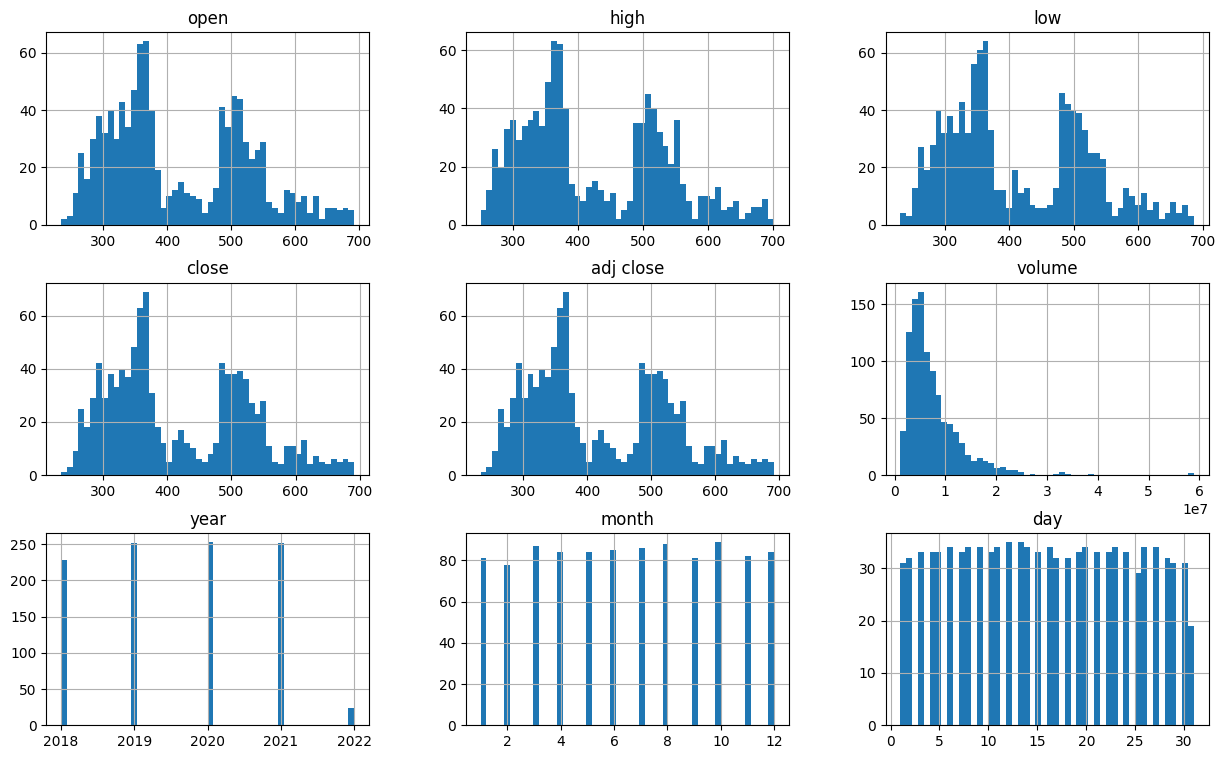

In [35]:
df.hist(figsize = (15,9), bins = 50)
plt.show()

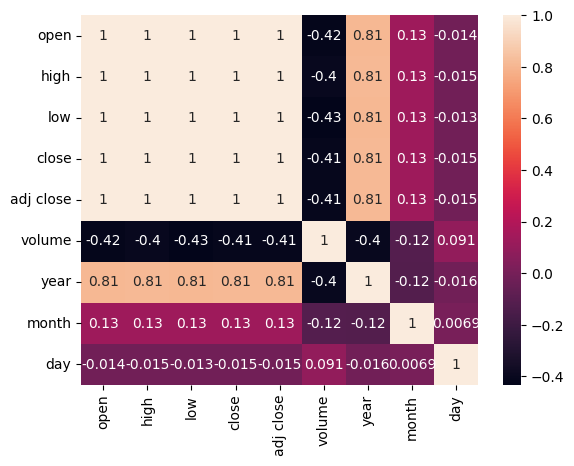

In [36]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [37]:
power = PowerTransformer('yeo-johnson')

In [51]:
transformed_df = power.fit_transform(df)
transformed_df = pd.DataFrame(transformed_df, columns = df.columns)

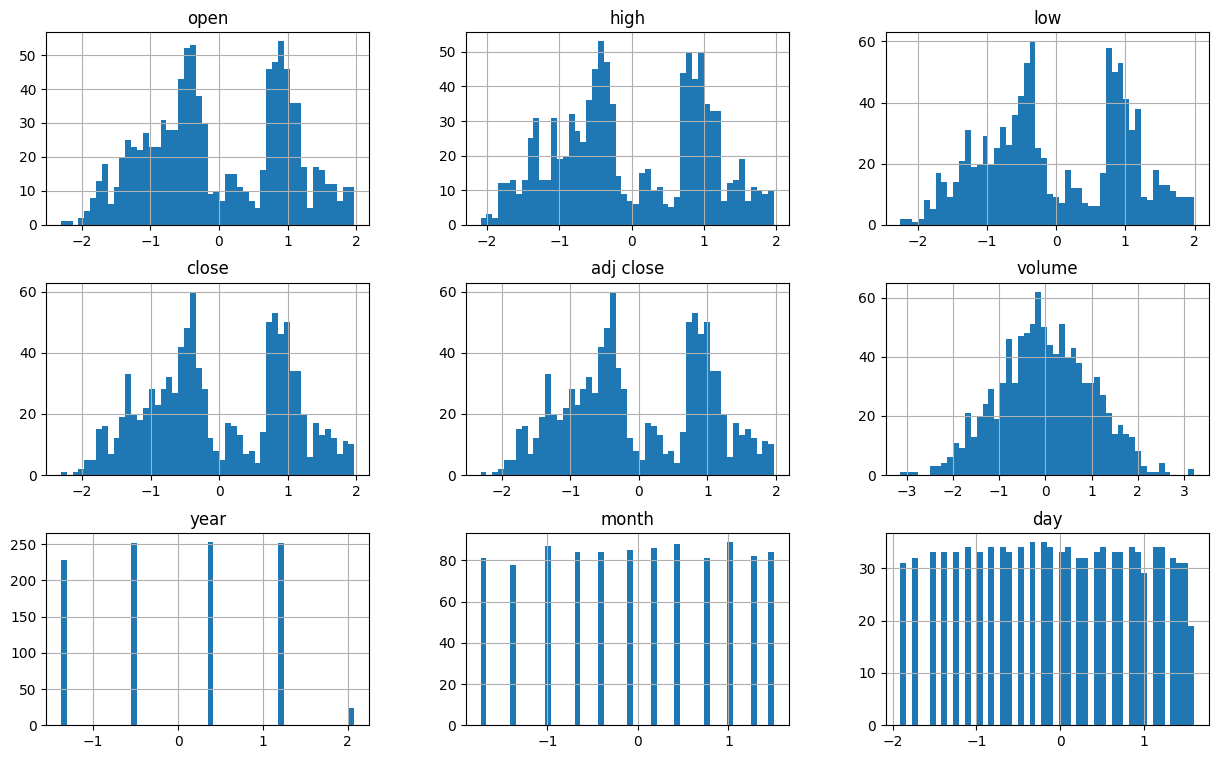

In [39]:
transformed_df.hist(figsize = (15,9), bins = 50)
plt.show()

In [40]:
transformed_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'year', 'month',
       'day'],
      dtype='object')

## FEATURE SELECTION

In [42]:
model_r = RandomForestRegressor(n_estimators=150, random_state = 42)
sfs = SFS(estimator=model_r, k_features='best', forward= True, floating = True, scoring = 'neg_mean_squared_error', cv = 12)

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(transformed_df.drop(['volume'], axis = 1), transformed_df.volume, test_size = 0.25, random_state = 42, shuffle = True)

In [44]:
sfs.fit(xtrain, ytrain)

SequentialFeatureSelector(cv=12,
                          estimator=RandomForestRegressor(n_estimators=150,
                                                          random_state=42),
                          floating=True, k_features=(1, 8),
                          scoring='neg_mean_squared_error')

In [47]:
list(sfs.k_feature_names_)

['high', 'low', 'year', 'month', 'day']

In [86]:
x = transformed_df[list(sfs.k_feature_names_)]
y = transformed_df.volume

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

# MODEL TRAINING

## LINEAR REGRESSION

In [88]:
model_lin = LinearRegression()

In [89]:
model_lin.fit(xtrain, ytrain)

LinearRegression()

## RANDOM FOREST

In [90]:
model_rand = RandomForestRegressor(n_estimators=200, random_state = 42)

In [91]:
model_rand.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=200, random_state=42)

# EVALUATION

In [93]:
pred_lin = model_lin.predict(xtest)
pred_rand = model_rand.predict(xtest)

print(f'LINEAR REGRESSION r2_score : {r2_score(ytest,pred_lin)}')
print(f'RANDOM FOREST r2_score : {r2_score(ytest,pred_rand)}')
print()
print(f'LINEAR REGRESSION mean_absolute_error : {mean_absolute_error(ytest,pred_lin)}')
print(f'RANDOM FOREST mean_absolute_error : {mean_absolute_error(ytest,pred_rand)}')

LINEAR REGRESSION r2_score : 0.6028486705503693
RANDOM FOREST r2_score : 0.7202373796296544

LINEAR REGRESSION mean_absolute_error : 0.4730308192956396
RANDOM FOREST mean_absolute_error : 0.40918725876756334


# CONCLUSION

### **Performance Metrics**

- **Linear Regression**
  - **R² Score**: 0.6028
  - **Mean Absolute Error (MAE)**: 0.4730

- **Random Forest**
  - **R² Score**: 0.7202
  - **Mean Absolute Error (MAE)**: 0.4092

### **Conclusion**

#### **1. R² Score**

- **Random Forest**: 0.7202
  - Indicates that the Random Forest model explains approximately 72.02% of the variance in the target variable. This suggests that the model has a better fit to the data compared to Linear Regression.

- **Linear Regression**: 0.6028
  - Indicates that the Linear Regression model explains approximately 60.28% of the variance in the target variable. While still reasonably good, it is lower than the Random Forest model.

#### **2. Mean Absolute Error (MAE)**

- **Random Forest**: 0.4092
  - The Random Forest model has a lower MAE, meaning that on average, its predictions are closer to the actual values compared to the Linear Regression model.

- **Linear Regression**: 0.4730
  - The Linear Regression model has a higher MAE, indicating that its predictions are, on average, further from the actual values compared to the Random Forest model.

### **Summary**

- **Best Model**: Based on the provided metrics, the **Random Forest** model performs better than the Linear Regression model.
  - **Higher R² Score**: The Random Forest model explains a greater proportion of the variance in the target variable.
  - **Lower MAE**: The Random Forest model provides predictions that are closer to the actual values.

**Recommendation**: Given that the Random Forest model has both a higher R² score and a lower MAE, it is the preferred model for this task. It provides a better fit to the data and more accurate predictions compared to the Linear Regression model.